## Variation Statistics

Now, let's represent how these variables correlate with one another among the monthly dataset at 1 hPa. For this, we'll use a binned analysis. First, let's load our data.

In [1]:
import xarray as xarr

filename = "./data/clipped_monthly_pressure_1988.nc"
data = xarr.open_dataset("./data/spatial_averages.nc")

Now, we can calculate the mean across each time point across all latitudes and longitudes.

In [2]:
# calculate nationwide average across the year
temp_timeseries = data['t'].squeeze()
clwc_timeseries = data['clwc'].squeeze()

Let's then bin them in different, proportional quartiles.

In [4]:
# Create quartile bins directly with xarray
temp_ts = data["t"].mean(dim=['lat', 'lon']).dropna(dim='valid_time')
clwc_ts = data["clwc"].mean(dim=['lat', 'lon']).dropna(dim='valid_time')

# Group by quartiles using xarray
quartile_groups = clwc_ts.groupby_bins(temp_ts, 4, labels=['Colder', 'Cooler', 'Warmer', 'Hotter'])

# Extract data for plotting
quartile_data = [group.values for label, group in quartile_groups]

Finally, we can save and show the figure.

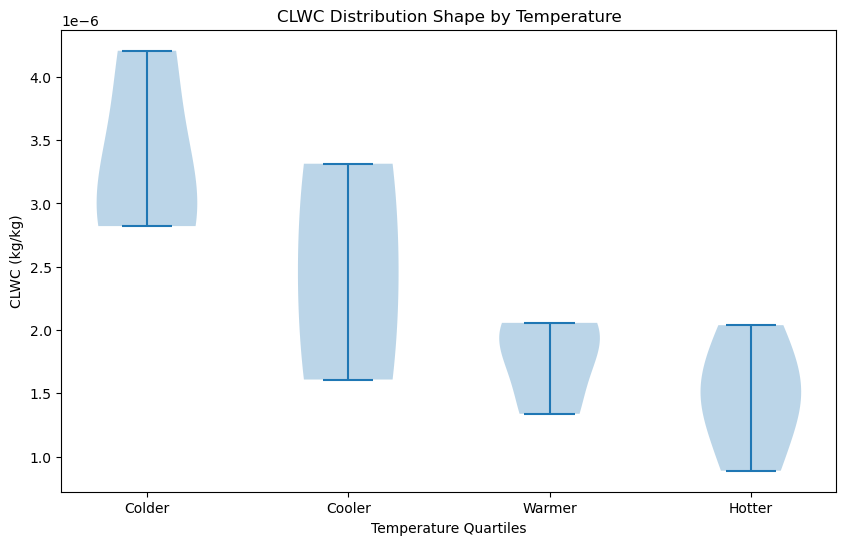

In [5]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10, 6))
plot.violinplot(quartile_data, positions=[1, 2, 3, 4])
plot.xticks([1, 2, 3, 4], ['Colder', 'Cooler', 'Warmer', 'Hotter'])
plot.ylabel('CLWC (kg/kg)')
plot.xlabel('Temperature Quartiles')
plot.title('CLWC Distribution Shape by Temperature')
plot.savefig("./plots/Temperature_Precipitation_Comparison.png")
plot.show()